ACTIVIDAD 1

Nelson Proaños
Emanuel Melo

CARGAR BASE DE DATOS

In [208]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly

In [209]:
df= pd.read_csv("activity_1_ml.csv")
df

,WAGE,EDUC,EXPER,GENDER,FAM_STATUS,TENURE
0,10.00,0,3,male,MARRIED,2
1,3.50,0,2,female,alone,0
2,3.30,0,5,female,single,0
3,5.00,0,15,male,married,5
4,11.25,0,28,male,married,25
...,...,...,...,...,...,...
547,3.00,0,9,male,NaN,0
548,7.63,0,8,female,single,4
549,4.50,0,36,female,married,6
550,NaN,0,28,male,married,3


In [107]:
df.shape

(552, 6)

In [108]:
df.describe()

,WAGE,EDUC,EXPER,TENURE
count,490.000000,552.0,552.000000,552.000000
mean,5.897816,0.0,16.822464,5.045290
std,3.703634,0.0,13.419559,7.128566
min,1.430000,0.0,1.000000,0.000000
25%,3.292500,0.0,5.000000,0.000000
50%,4.550000,0.0,13.000000,2.000000
75%,6.880000,0.0,26.000000,7.000000
max,24.980000,0.0,51.000000,44.000000


In [109]:
df.isnull().sum()

WAGE          62
EDUC           0
EXPER          0
GENDER         3
FAM_STATUS    83
TENURE         0
dtype: int64

In [110]:
numerical_features = ["WAGE", "EDUC", "EXPER", "TENURE"]
categorical_features = ["GENDER", "FAM_STATUS"]

In [112]:
numerical_features

['WAGE', 'EDUC', 'EXPER', 'TENURE']

In [113]:
categorical_features

['GENDER', 'FAM_STATUS']

In [114]:
wage = df[['WAGE', 'EDUC', 'EXPER', 'GENDER', 'FAM_STATUS', 'TENURE']]

In [116]:
wage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   WAGE        490 non-null    float64
 1   EDUC        552 non-null    int64  
 2   EXPER       552 non-null    int64  
 3   GENDER      549 non-null    object 
 4   FAM_STATUS  469 non-null    object 
 5   TENURE      552 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 26.0+ KB


In [158]:
wage = df.drop('EDUC', axis=1)

In [159]:
wage

,WAGE,EXPER,GENDER,FAM_STATUS,TENURE
0,10.00,3,male,MARRIED,2
1,3.50,2,female,alone,0
2,3.30,5,female,single,0
3,5.00,15,male,married,5
4,11.25,28,male,married,25
...,...,...,...,...,...
547,3.00,9,male,NaN,0
548,7.63,8,female,single,4
549,4.50,36,female,married,6
550,NaN,28,male,married,3


In [160]:
wage.duplicated().sum()

17

In [161]:
wage.drop_duplicates(inplace=True)
wage.reset_index(drop=True, inplace=True)

In [162]:
wage.duplicated().sum()

0

In [163]:
wage

,WAGE,EXPER,GENDER,FAM_STATUS,TENURE
0,10.00,3,male,MARRIED,2
1,3.50,2,female,alone,0
2,3.30,5,female,single,0
3,5.00,15,male,married,5
4,11.25,28,male,married,25
...,...,...,...,...,...
530,2.90,1,male,single,2
531,3.25,14,female,married,2
532,7.63,8,female,single,4
533,NaN,28,male,married,3


In [164]:
dictio_correct = {'woman':'female',
                  'fem':'female',
                  'man':'male',
                  'female':'female',
                  'male':'male',
                  'FEMALE':'female',
                  'MALE':'male'}

In [170]:
wage['GENDER'] = wage['GENDER'].map(dictio_correct)

In [171]:
wage['GENDER'].unique()

array(['male', 'female', nan], dtype=object)

In [172]:
wage = wage.dropna(subset=['GENDER'])

In [173]:
wage['GENDER'].unique()

array(['male', 'female'], dtype=object)

In [174]:
wage

,WAGE,EXPER,GENDER,FAM_STATUS,TENURE
0,10.00,3,male,MARRIED,2
1,3.50,2,female,alone,0
2,3.30,5,female,single,0
3,5.00,15,male,married,5
4,11.25,28,male,married,25
...,...,...,...,...,...
530,2.90,1,male,single,2
531,3.25,14,female,married,2
532,7.63,8,female,single,4
533,NaN,28,male,married,3


In [175]:
wage['FAM_STATUS'].unique()

array(['MARRIED', 'alone', 'single', 'married', nan, 'SINGLE'],
      dtype=object)

In [176]:
dictio_correct = {'MARRIED':'married',
                  'alone':'single',
                  'SINGLE':'single',
                  'single':'single',
                  'married':'married'}

In [177]:
wage['FAM_STATUS'] = wage['FAM_STATUS'].map(dictio_correct)

<ipython-input-177-08c9c447c97d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wage['FAM_STATUS'] = wage['FAM_STATUS'].map(dictio_correct)


In [178]:
wage = wage.dropna(subset=['FAM_STATUS'])

In [179]:
wage

,WAGE,EXPER,GENDER,FAM_STATUS,TENURE
0,10.00,3,male,married,2
1,3.50,2,female,single,0
2,3.30,5,female,single,0
3,5.00,15,male,married,5
4,11.25,28,male,married,25
...,...,...,...,...,...
530,2.90,1,male,single,2
531,3.25,14,female,married,2
532,7.63,8,female,single,4
533,NaN,28,male,married,3


In [180]:
wage['EXPER'].unique()

array([ 3,  2,  5, 15, 28, 47,  1, 38, 27, 18,  6, 17, 14, 22, 31,  7, 30,
       19, 39, 43, 48, 10, 11, 24, 35,  9, 25, 42, 41, 26, 29,  8,  4, 37,
       34, 23, 44, 33, 13, 16, 21, 32, 36, 51, 45, 20, 49, 40, 12])

In [181]:
wage['WAGE'].unique()

array([10.        ,  3.5       ,  3.29999995,  5.        , 11.25      ,
        4.28999996,  5.57999992,  3.        ,  4.6500001 ,         nan,
        7.5       ,  3.3499999 ,  7.        ,  3.27999997,  3.25      ,
       12.5       ,  3.4000001 ,  4.38000011,  3.28999996, 11.56000042,
        8.44999981,  3.20000005,  4.80999994,  3.0999999 ,  2.9000001 ,
        4.        ,  4.75      , 17.70999908,  4.5       ,  5.11000013,
        7.25      ,  6.        ,  3.05999994,  6.17999983,  6.07999992,
        2.95000005, 22.20000076,  3.6400001 , 11.97999954, 13.07999992,
        1.96000004,  3.82999992,  5.5999999 ,  8.75      ,  4.57000017,
        4.90999985, 13.32999992,  8.47999954,  8.43000031, 11.81999969,
        9.09000015, 10.94999981,  5.25      ,  3.75      , 15.38000011,
        3.25999999,  6.76000023,  8.52999973,  3.50999999,  3.45000005,
       10.38000011,  2.70000005, 19.97999954, 12.39000034,  5.05000019,
        5.69999981,  4.11000013,  7.5999999 ,  7.78000021,  6.25

In [182]:
wage = wage.dropna(subset=['WAGE'])

In [183]:
wage['WAGE'].unique()

array([10.        ,  3.5       ,  3.29999995,  5.        , 11.25      ,
        4.28999996,  5.57999992,  3.        ,  4.6500001 ,  7.5       ,
        3.3499999 ,  7.        ,  3.27999997,  3.25      , 12.5       ,
        3.4000001 ,  4.38000011,  3.28999996, 11.56000042,  8.44999981,
        3.20000005,  4.80999994,  3.0999999 ,  2.9000001 ,  4.        ,
        4.75      , 17.70999908,  4.5       ,  5.11000013,  7.25      ,
        6.        ,  3.05999994,  6.17999983,  6.07999992,  2.95000005,
       22.20000076,  3.6400001 , 11.97999954, 13.07999992,  1.96000004,
        3.82999992,  5.5999999 ,  8.75      ,  4.57000017,  4.90999985,
       13.32999992,  8.47999954,  8.43000031, 11.81999969,  9.09000015,
       10.94999981,  5.25      ,  3.75      , 15.38000011,  3.25999999,
        6.76000023,  8.52999973,  3.50999999,  3.45000005, 10.38000011,
        2.70000005, 19.97999954, 12.39000034,  5.05000019,  5.69999981,
        4.11000013,  7.5999999 ,  7.78000021,  6.25      ,  4.09

In [184]:
wage

,WAGE,EXPER,GENDER,FAM_STATUS,TENURE
0,10.00,3,male,married,2
1,3.50,2,female,single,0
2,3.30,5,female,single,0
3,5.00,15,male,married,5
4,11.25,28,male,married,25
...,...,...,...,...,...
529,6.46,27,male,married,0
530,2.90,1,male,single,2
531,3.25,14,female,married,2
532,7.63,8,female,single,4


In [185]:
wage['TENURE'].unique()

array([ 2,  0,  5, 25,  1, 13,  6,  3, 24,  8, 10,  7, 23, 15, 11, 12, 20,
       21,  9, 14,  4, 16, 28, 22, 26, 17, 33, 30, 31, 18, 34, 44])

In [186]:
wage.isna().sum()

WAGE          0
EXPER         0
GENDER        0
FAM_STATUS    0
TENURE        0
dtype: int64

In [187]:
wage

,WAGE,EXPER,GENDER,FAM_STATUS,TENURE
0,10.00,3,male,married,2
1,3.50,2,female,single,0
2,3.30,5,female,single,0
3,5.00,15,male,married,5
4,11.25,28,male,married,25
...,...,...,...,...,...
529,6.46,27,male,married,0
530,2.90,1,male,single,2
531,3.25,14,female,married,2
532,7.63,8,female,single,4


In [188]:
gen = wage['GENDER'].value_counts()
gen.index = ['m', 'f']

In [189]:
gen

m    206
f    197
Name: GENDER, dtype: int64

<BarContainer object of 2 artists>

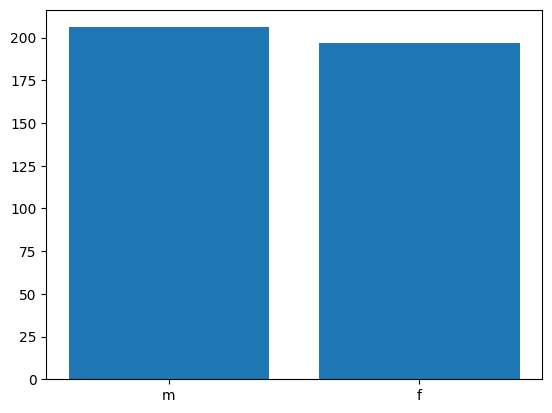

In [190]:
plt.bar(gen.index, gen.values)

<Axes: ylabel='None'>

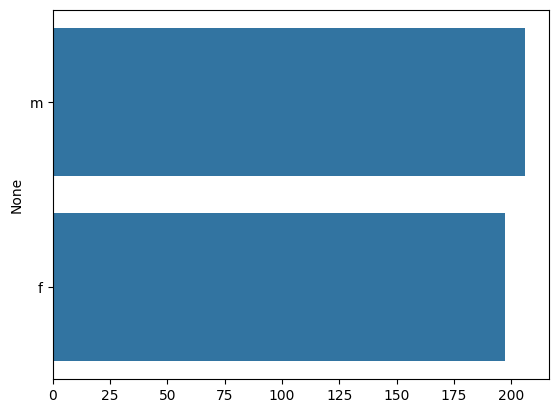

In [191]:
sns.barplot(x=gen.values, y=gen.index, orient='h')

In [192]:
wage['exper_inter'] = pd.cut(wage['EXPER'], 5, labels=['muy baja', 'baja', 'media', 'alta', 'muy alta'])

<ipython-input-192-72cf725b2e64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wage['exper_inter'] = pd.cut(wage['EXPER'], 5, labels=['muy baja', 'baja', 'media', 'alta', 'muy alta'])


In [193]:
wage['exper_inter']

0      muy baja
1      muy baja
2      muy baja
3          baja
4         media
         ...   
529       media
530    muy baja
531        baja
532    muy baja
534    muy baja
Name: exper_inter, Length: 403, dtype: category
Categories (5, object): ['muy baja' < 'baja' < 'media' < 'alta' < 'muy alta']

In [194]:
wage = wage.replace({'GENDER':{1:'f',0:'m'}})

In [195]:
wage['GENDER'].value_counts()

male      206
female    197
Name: GENDER, dtype: int64

In [196]:
pivot = wage.pivot_table(values='WAGE',
                 index='exper_inter',
                 columns='GENDER',
                 aggfunc='mean').stack().to_frame().reset_index().rename(columns={0:'mean_WAGE','GENDER':'gender'})

In [197]:
wage.pivot_table(values='WAGE',
                 index='exper_inter',
                 columns='GENDER',
                 aggfunc='mean')

GENDER,female,male
exper_inter,,
muy baja,4.084937,6.000778
baja,5.416111,7.185952
media,4.360435,10.268125
alta,4.030357,7.750833
muy alta,4.640769,6.058889


In [198]:
pivot

,exper_inter,gender,mean_WAGE
0,muy baja,female,4.084937
1,muy baja,male,6.000778
2,baja,female,5.416111
3,baja,male,7.185952
4,media,female,4.360435
5,media,male,10.268125
6,alta,female,4.030357
7,alta,male,7.750833
8,muy alta,female,4.640769
9,muy alta,male,6.058889


<Axes: xlabel='exper_inter', ylabel='mean_WAGE'>

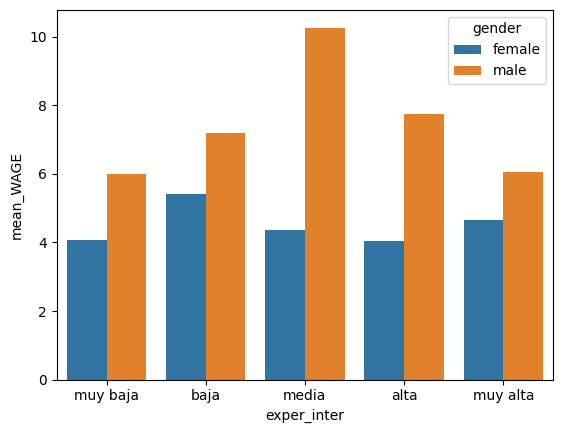

In [199]:
sns.barplot(data=pivot, x='exper_inter',y='mean_WAGE',hue='gender')

<Axes: title={'center': 'Gráfico 1'}, xlabel='exper_inter', ylabel='mean_WAGE'>

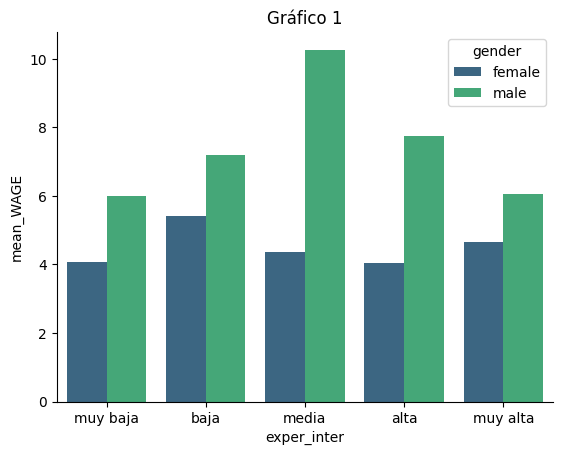

In [200]:
fig, ax = plt.subplots(1, 1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("Gráfico 1")
sns.barplot(data=pivot,
            x='exper_inter',
            y='mean_WAGE',
            hue='gender',
            palette='viridis',
            ax=ax )

<Axes: xlabel='FAM_STATUS'>

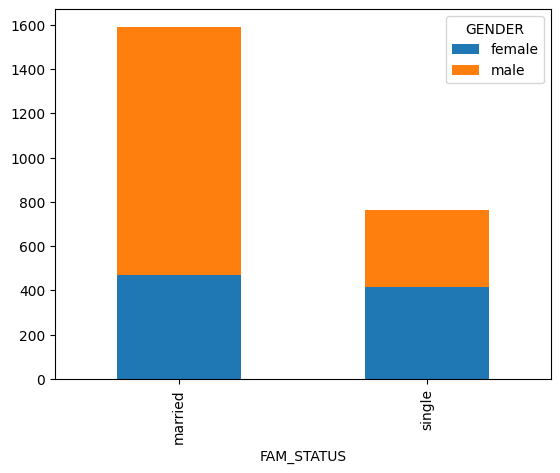

In [202]:
(wage.groupby(['GENDER','FAM_STATUS'])['WAGE']
 .sum()
 .reset_index()
 .pivot(index='FAM_STATUS',values='WAGE',columns='GENDER')
 .plot(kind='bar',stacked=True))

<Axes: ylabel='WAGE'>

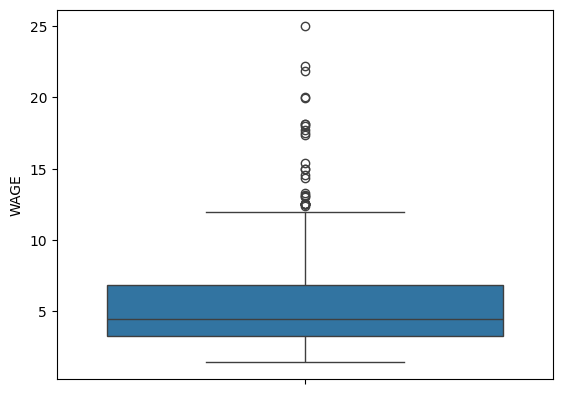

In [212]:
sns.boxplot(data=wage, y='WAGE')

<Axes: ylabel='GENDER'>

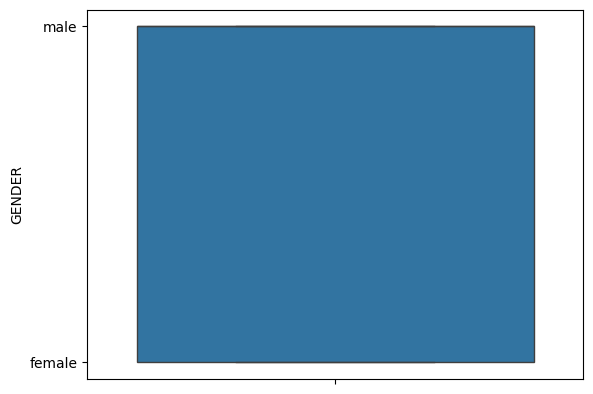

In [214]:
sns.boxplot(data=wage, y='GENDER')


<Axes: ylabel='TENURE'>

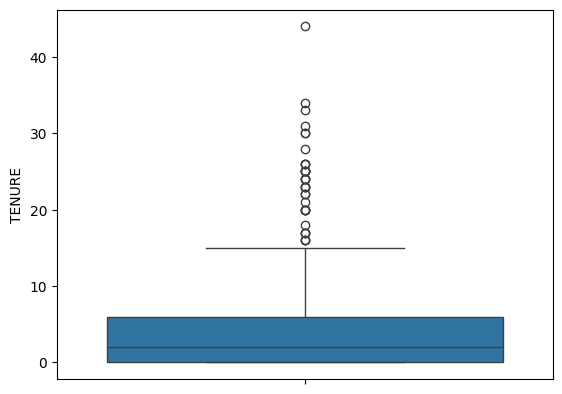

In [215]:
sns.boxplot(data=wage, y='TENURE')
